# Using Nonlinear Transformations

## » Doing variable transformations

### • importing boston dataset and reindexing it

In [31]:
from sklearn.datasets import load_boston
import random
from random import shuffle

boston = load_boston()
# creates a replicalbe shuffling, and will affect all random number
# generation
random.seed(0) 
# lists all of the index in the first column from the boston dataset
new_index = list(range(boston.data.shape[0]))
# shuffling the index
shuffle(new_index)
# print(new_index[:10])

x_boston, y_boston = boston.data[new_index], boston.target[new_index]
print(x_boston.shape, y_boston.shape, boston.feature_names)

# the detail of boston dataset
# print(boston.DESCR)

(506, 13) (506,) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### • converting the array into pandas dataframe

In [28]:
import pandas as pd
df = pd.DataFrame(x_boston, columns=boston.feature_names)
df['target'] = y_boston
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08,9.5
1,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64,22.6


### • scatter plotting a feature and the target to explore a possible transformations

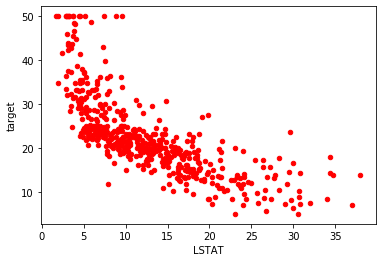

In [24]:
# plots the LSTAT feature and the target with sactter plot
ax = df.plot(kind='scatter', x='LSTAT', y='target', c='r')

### • trying some transformations to linearize the feature

In [21]:
import numpy as np
# used to measure the performance of the predictors (x) in respect of the 
# prediction (y) using linear regression
from sklearn.feature_selection import f_regression
# takes the values from LSTAT feature and assigns it to a variable
single_variable = df['LSTAT'].values.reshape(-1,1)
F1, pval = f_regression(single_variable, y_boston)
print(f'F score for the original feature {F1}')
F2, pval = f_regression(np.log(single_variable), y_boston)
print(f'F score for the transformed feature {F2}')

F score for the original feature [601.61787111]
F score for the transformed feature [1000.23614782]
